In [7]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import copy
import matplotlib.pyplot as plt

In [8]:
results = pd.read_csv(r"metacardis/anna_karenina/results/all_res_equal_prop_df.csv", index_col = 0)

all_diseases = list(set(list(results["normal_group"]) + list(results["anomaly_group"])))



In [9]:
summary_res = pd.DataFrame(columns = ["Normal", "Anomaly", "AUC"])

for disease1 in all_diseases:
    for disease2 in all_diseases:
        if disease1 == disease2:
            continue
        cur_subset = results[(results["normal_group"] == disease1) & (results["anomaly_group"] == disease2)]
        if cur_subset.shape[0] == 0:
            cur_subset = results[(results["normal_group"] == disease2) & (results["anomaly_group"] == disease1)]
            cur_subset["anomaly"] = ~cur_subset["anomaly"]
        fpr, tpr, thresholds = metrics.roc_curve(cur_subset["anomaly"], cur_subset["score"])
        
        tmp = pd.DataFrame.from_dict({"Normal": disease1, "Anomaly": disease2, "AUC": metrics.auc(fpr, tpr)}, orient = "index").T
        summary_res = pd.concat([summary_res, tmp])

to_change_dict = {"1": "Metabolic syndrome", "2a": "Severe obesity", "2b": "Eligible for bariatric surgery",
                  "3": "T2D", "4": "First acute CAD", "5": "Chronic CAD",  "6": "Chronic CAD and heart failure", 
                  "8" : "Control"}
for key in to_change_dict:
    summary_res = summary_res.replace(key, to_change_dict[key])

summary_res["AUC_minus_half"] = summary_res["AUC"] - 0.5

C:\Users\Omri\AppData\Local\Temp\ipykernel_18016\746198040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_subset["anomaly"] = ~cur_subset["anomaly"]
C:\Users\Omri\AppData\Local\Temp\ipykernel_18016\746198040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_subset["anomaly"] = ~cur_subset["anomaly"]
C:\Users\Omri\AppData\Local\Temp\ipykernel_18016\746198040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [10]:
custom_order = ["Control", "Severe obesity", "Eligible for bariatric surgery", "Metabolic syndrome", "T2D",
                "First acute CAD", "Chronic CAD", "Chronic CAD and heart failure"]

summary_res['Normal'] = pd.Categorical(summary_res['Normal'], categories=custom_order, ordered=True)
summary_res['Anomaly'] = pd.Categorical(summary_res['Anomaly'], categories=custom_order, ordered=True)
# Sort by 'col1' first, then by 'col2'
summary_res = summary_res.sort_values(by=['Normal', "Anomaly"])


In [11]:
summary_res

,Normal,Anomaly,AUC,AUC_minus_half
0,Control,Severe obesity,0.676683,0.176683
0,Control,Eligible for bariatric surgery,0.725930,0.225930
0,Control,Metabolic syndrome,0.575780,0.075780
0,Control,T2D,0.696117,0.196117
0,Control,First acute CAD,0.580898,0.080898
0,Control,Chronic CAD,0.566812,0.066812
0,Control,Chronic CAD and heart failure,0.641763,0.141763
0,Severe obesity,Control,0.323317,-0.176683
0,Severe obesity,Eligible for bariatric surgery,0.580962,0.080962
0,Severe obesity,Metabolic syndrome,0.411663,-0.088337


In [30]:
summary_res[["Normal", "AUC"]].groupby(by = "Normal").mean()

C:\Users\Omri\AppData\Local\Temp\ipykernel_18016\1966809019.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_res[["Normal", "AUC"]].groupby(by = "Normal").mean()


,AUC
Normal,
Control,0.637712
Severe obesity,0.449548
Eligible for bariatric surgery,0.376757
Metabolic syndrome,0.550959
T2D,0.402528
First acute CAD,0.550253
Chronic CAD,0.547004
Chronic CAD and heart failure,0.485238


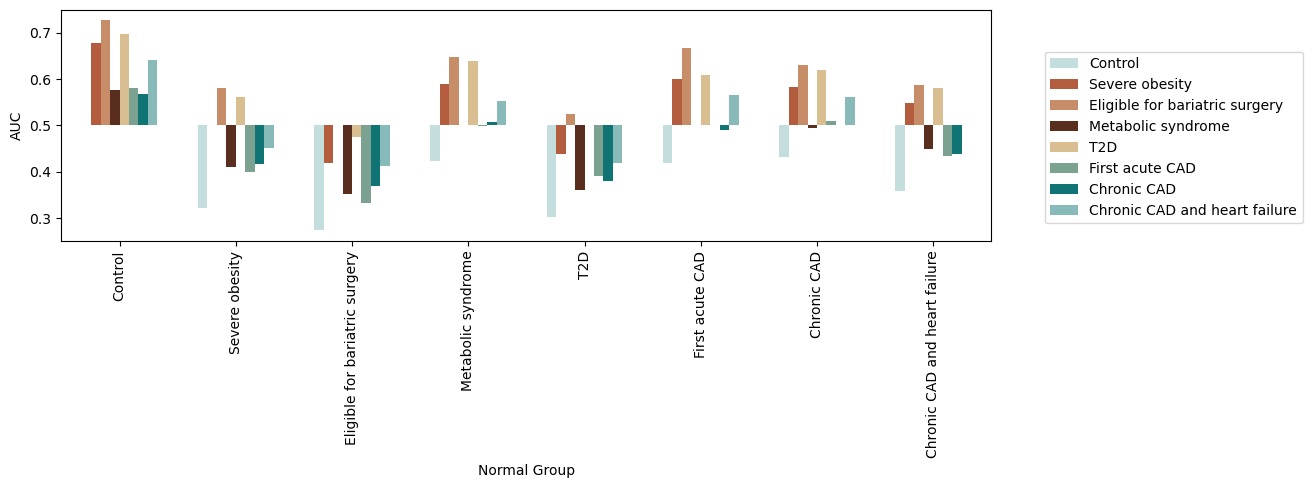

In [13]:
  #642915,  #c7522a,  #d68a58,  #e5c185,  #74a892,  #008585,  #80c2c2 and  #c0e1e1.

palette = {"Metabolic syndrome": "#642915", "Severe obesity": "#c7522a", "Eligible for bariatric surgery": "#d68a58",
                  "T2D": "#e5c185", "First acute CAD": "#74a892", "Chronic CAD": "#008585", "Chronic CAD and heart failure": "#80c2c2", 
                  "Control": "#c0e1e1"}

fig, ax = plt.subplots(figsize=(12, 3))
sns.barplot(data = summary_res, x = "Normal", y = "AUC_minus_half", hue = "Anomaly", order = custom_order, palette = palette,
           width= 0.65)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 0.85))


yticks = [-0.2, -0.1, 0, 0.1, 0.2]  # Your tick positions
ylabels = [0.3, 0.4, 0.5, 0.6, 0.7]
plt.yticks(yticks, ylabels)

plt.ylabel("AUC")
plt.xlabel("Normal Group")


C:\Users\Omri\AppData\Local\Temp\ipykernel_18016\2993610991.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = summary_res_control_only, x = "Anomaly", y = "AUC_minus_half", order = custom_order_wo_control, palette = palette,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


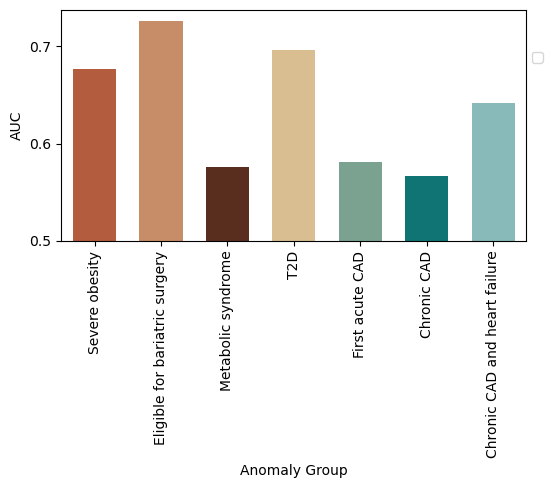

In [25]:
palette = {"Metabolic syndrome": "#642915", "Severe obesity": "#c7522a", "Eligible for bariatric surgery": "#d68a58",
                  "T2D": "#e5c185", "First acute CAD": "#74a892", "Chronic CAD": "#008585", "Chronic CAD and heart failure": "#80c2c2"}
#                  "Control": "#c0e1e1"}
custom_order_wo_control = ["Severe obesity", "Eligible for bariatric surgery", "Metabolic syndrome", "T2D",
                "First acute CAD", "Chronic CAD", "Chronic CAD and heart failure"]

summary_res_control_only = summary_res[summary_res["Normal"] == "Control"]

fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(data = summary_res_control_only, x = "Anomaly", y = "AUC_minus_half", order = custom_order_wo_control, palette = palette,
           width= 0.65)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 0.85))


yticks = [0, 0.1, 0.2]  # Your tick positions
ylabels = [0.5, 0.6, 0.7]
plt.yticks(yticks, ylabels)

plt.ylabel("AUC")
plt.xlabel("Anomaly Group")


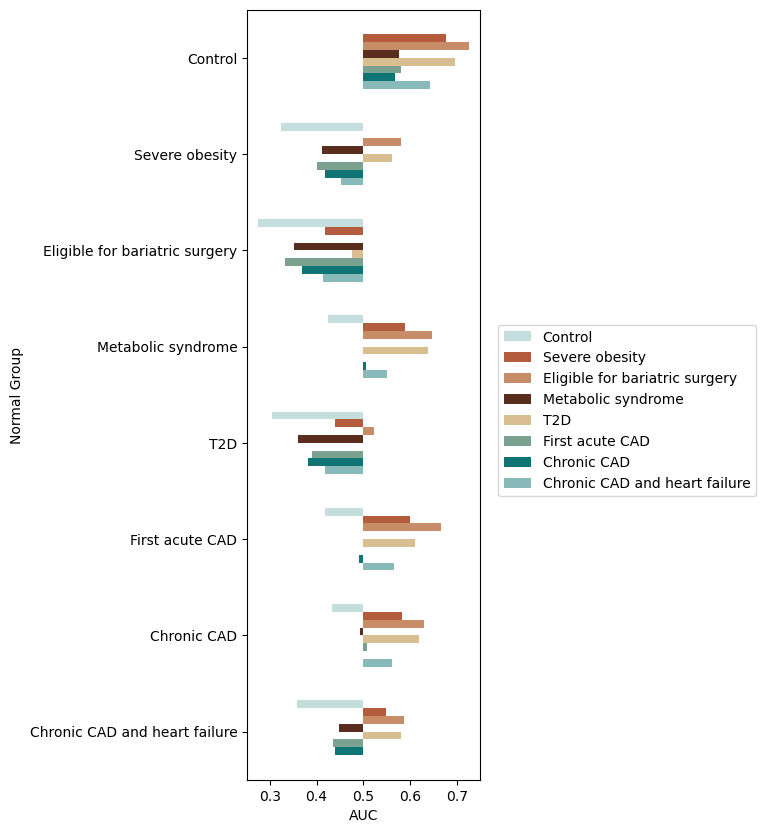

In [115]:
  #642915,  #c7522a,  #d68a58,  #e5c185,  #74a892,  #008585,  #80c2c2 and  #c0e1e1.

palette = {"Metabolic syndrome": "#642915", "Severe obesity": "#c7522a", "Eligible for bariatric surgery": "#d68a58",
                  "T2D": "#e5c185", "First acute CAD": "#74a892", "Chronic CAD": "#008585", "Chronic CAD and heart failure": "#80c2c2", 
                  "Control": "#c0e1e1"}

fig, ax = plt.subplots(figsize=(3, 10))
sns.barplot(data = summary_res, y = "Normal", x = "AUC_minus_half", hue = "Anomaly", order = custom_order, palette = palette,
           width= 0.65)
# plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 0.6))


yticks = [-0.2, -0.1, 0, 0.1, 0.2]  # Your tick positions
ylabels = [0.3, 0.4, 0.5, 0.6, 0.7]
plt.xticks(yticks, ylabels)

plt.xlabel("AUC")
plt.ylabel("Normal Group")